In [2]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [3]:
# 한글화
fm = mp.font_manager.FontManager()
plt.rcParams['font.family'] = 'Malgun Gothic'

# 인구수 추이

In [4]:
# 데이터 불러오기
df_pop = pd.read_csv('Data/13_소년 인구 대비 소년범죄율 추이_김유민_1.csv', encoding='cp949')
df_pop.head()

,행정구역별(읍면동),연령별,2015,2016,2017,2018,2019
0,행정구역별(읍면동),연령별,내국인(명),내국인(명),내국인(명),내국인(명),내국인(명)
1,전국,15~19세,"3,170,545","3,056,728","2,891,577","2,735,274","2,595,613"
2,NaN,15세미만,"6,906,707","6,768,338","6,631,762","6,479,881","6,311,951"
3,NaN,15~64세,"36,229,874","36,312,340","36,196,132","36,103,955","35,942,771"
4,NaN,65세이상,"6,569,082","6,775,118","7,115,366","7,394,115","7,745,563"


In [5]:
df_pop = df_pop[df_pop['연령별']!='연령별'].copy()
df_pop.head()

,행정구역별(읍면동),연령별,2015,2016,2017,2018,2019
1,전국,15~19세,"3,170,545","3,056,728","2,891,577","2,735,274","2,595,613"
2,NaN,15세미만,"6,906,707","6,768,338","6,631,762","6,479,881","6,311,951"
3,NaN,15~64세,"36,229,874","36,312,340","36,196,132","36,103,955","35,942,771"
4,NaN,65세이상,"6,569,082","6,775,118","7,115,366","7,394,115","7,745,563"


In [6]:
df_pop = df_pop.drop(['행정구역별(읍면동)'], axis='columns')
df_pop.head()

,연령별,2015,2016,2017,2018,2019
1,15~19세,"3,170,545","3,056,728","2,891,577","2,735,274","2,595,613"
2,15세미만,"6,906,707","6,768,338","6,631,762","6,479,881","6,311,951"
3,15~64세,"36,229,874","36,312,340","36,196,132","36,103,955","35,942,771"
4,65세이상,"6,569,082","6,775,118","7,115,366","7,394,115","7,745,563"


In [7]:
year = ['2015','2016','2017','2018','2019']
for i in year:
    df_pop[i] = df_pop[i].str.replace(',','')

In [8]:
year = ['2015','2016','2017','2018','2019']
for i in year:
    df_pop[i] = df_pop[i].astype(int)
df_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 1 to 4
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연령별     4 non-null      object
 1   2015    4 non-null      int32 
 2   2016    4 non-null      int32 
 3   2017    4 non-null      int32 
 4   2018    4 non-null      int32 
 5   2019    4 non-null      int32 
dtypes: int32(5), object(1)
memory usage: 144.0+ bytes


In [9]:
df_pop

,연령별,2015,2016,2017,2018,2019
1,15~19세,3170545,3056728,2891577,2735274,2595613
2,15세미만,6906707,6768338,6631762,6479881,6311951
3,15~64세,36229874,36312340,36196132,36103955,35942771
4,65세이상,6569082,6775118,7115366,7394115,7745563


In [10]:
df_pop.loc[5,'연령별'] = ['19세 미만']
df_pop.loc[6,'연령별'] = ['19세 이상']

In [11]:
year = ['2015','2016','2017','2018','2019']
for i in year:
    df_pop.loc[5,i] = df_pop.loc[1,i] + df_pop.loc[2,i]

In [12]:
year = ['2015','2016','2017','2018','2019']
for i in year:
    df_pop.loc[6,i] = df_pop.loc[3,i] + df_pop.loc[4,i] - df_pop.loc[1,i]

In [13]:
df_pop

,연령별,2015,2016,2017,2018,2019
1,15~19세,3170545.0,3056728.0,2891577.0,2735274.0,2595613.0
2,15세미만,6906707.0,6768338.0,6631762.0,6479881.0,6311951.0
3,15~64세,36229874.0,36312340.0,36196132.0,36103955.0,35942771.0
4,65세이상,6569082.0,6775118.0,7115366.0,7394115.0,7745563.0
5,19세 미만,10077252.0,9825066.0,9523339.0,9215155.0,8907564.0
6,19세 이상,39628411.0,40030730.0,40419921.0,40762796.0,41092721.0


In [14]:
df_pop_19 = df_pop[df_pop['연령별'].str.contains('19세 ')]
df_pop_19.head()

,연령별,2015,2016,2017,2018,2019
5,19세 미만,10077252.0,9825066.0,9523339.0,9215155.0,8907564.0
6,19세 이상,39628411.0,40030730.0,40419921.0,40762796.0,41092721.0


In [15]:
df_pop_19_test = df_pop[~df_pop['연령별'].str.contains('19세 ', case = True)]
df_pop_19_test.head()

,연령별,2015,2016,2017,2018,2019
1,15~19세,3170545.0,3056728.0,2891577.0,2735274.0,2595613.0
2,15세미만,6906707.0,6768338.0,6631762.0,6479881.0,6311951.0
3,15~64세,36229874.0,36312340.0,36196132.0,36103955.0,35942771.0
4,65세이상,6569082.0,6775118.0,7115366.0,7394115.0,7745563.0


In [16]:
df_pop_19_m = df_pop_19.melt(id_vars='연령별')
df_pop_19_m

,연령별,variable,value
0,19세 미만,2015,10077252.0
1,19세 이상,2015,39628411.0
2,19세 미만,2016,9825066.0
3,19세 이상,2016,40030730.0
4,19세 미만,2017,9523339.0
5,19세 이상,2017,40419921.0
6,19세 미만,2018,9215155.0
7,19세 이상,2018,40762796.0
8,19세 미만,2019,8907564.0
9,19세 이상,2019,41092721.0


In [17]:
df_pop_19_m = df_pop_19_m.rename(columns={'variable':'연도', 'value':'인구수'})

In [18]:
df_pop_19_m[df_pop_19_m['연령별']=='19세 미만']

,연령별,연도,인구수
0,19세 미만,2015,10077252.0
2,19세 미만,2016,9825066.0
4,19세 미만,2017,9523339.0
6,19세 미만,2018,9215155.0
8,19세 미만,2019,8907564.0


<AxesSubplot:xlabel='연도'>

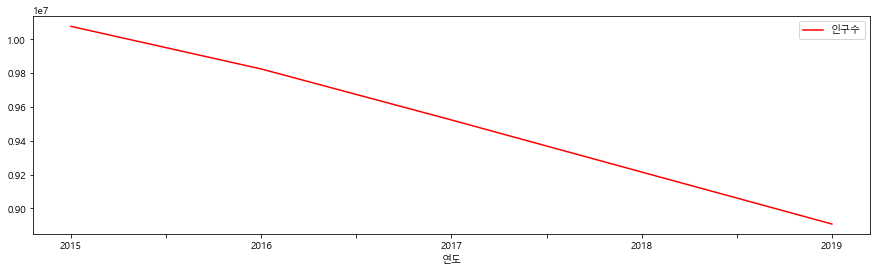

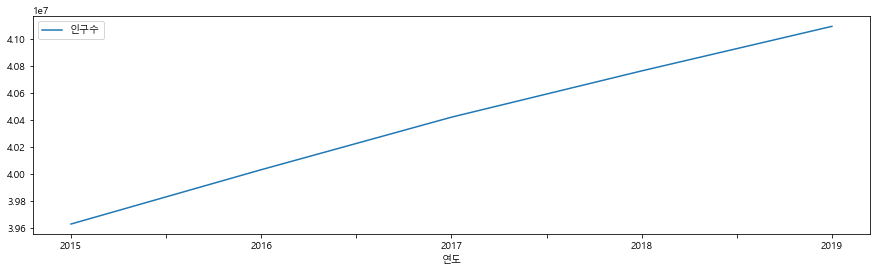

In [19]:
df_pop_19_m[df_pop_19_m['연령별']=='19세 미만'].set_index(['연도']).plot(figsize=(15,4), color = 'red')
df_pop_19_m[df_pop_19_m['연령별']=='19세 이상'].set_index(['연도']).plot(figsize=(15,4))

**19세 미만** 인구는 감소하고 있고 **19세 이상** 인구는 증가하고 있음

# 소년 인구 당 소년 범죄율 추이

In [20]:
# 데이터 불러오기
df_age = pd.read_csv('Data/13_소년 인구 대비 소년범죄율 추이_김유민_2.csv', encoding='cp949')
df_age.head(10)

,범죄별(1),범죄별(2),범죄별(3),2015,2015.1,2016,2016.1,2017,2017.1,2018,2018.1,2019,2019.1
0,범죄별(1),범죄별(2),범죄별(3),소년,성인,소년,성인,소년,성인,소년,성인,소년,성인
1,합계,소계,소계,71035,1817924,76000,1897655,72759,1745478,66142,1637944,66247,1657252
2,형법범,소계,소계,56962,904872,61162,920760,58255,878991,54205,878917,54497,914549
3,형법범,재산범죄,소계,32068,384547,33088,387486,29056,375712,26497,390397,27809,416686
4,형법범,재산범죄,절도,21170,77548,22534,84150,20008,86038,16904,80743,17141,84567
5,형법범,재산범죄,장물,801,3842,591,3197,443,2660,290,1494,175,1277
6,형법범,재산범죄,사기,7844,227238,7482,222304,6225,210386,6968,229056,8088,247739
7,형법범,재산범죄,횡령,1456,35675,1494,35260,1424,33568,1393,35094,1280,35956
8,형법범,재산범죄,배임,4,9341,7,8499,1,8974,2,9080,1,9567
9,형법범,재산범죄,손괴,793,30903,980,34076,955,34086,940,34930,1124,37580


In [21]:
df_pop_19_m[df_pop_19_m['연령별']=='19세 미만']

,연령별,연도,인구수
0,19세 미만,2015,10077252.0
2,19세 미만,2016,9825066.0
4,19세 미만,2017,9523339.0
6,19세 미만,2018,9215155.0
8,19세 미만,2019,8907564.0


In [22]:
df_age = df_age.drop(['범죄별(2)','범죄별(3)'], axis='columns')

In [23]:
df_age.head()

,범죄별(1),2015,2015.1,2016,2016.1,2017,2017.1,2018,2018.1,2019,2019.1
0,범죄별(1),소년,성인,소년,성인,소년,성인,소년,성인,소년,성인
1,합계,71035,1817924,76000,1897655,72759,1745478,66142,1637944,66247,1657252
2,형법범,56962,904872,61162,920760,58255,878991,54205,878917,54497,914549
3,형법범,32068,384547,33088,387486,29056,375712,26497,390397,27809,416686
4,형법범,21170,77548,22534,84150,20008,86038,16904,80743,17141,84567


### 소년

In [24]:
df_young_age = df_age[['2015','2016','2017','2018','2019']]

In [25]:
df_young_age

,2015,2016,2017,2018,2019
0,소년,소년,소년,소년,소년
1,71035,76000,72759,66142,66247
2,56962,61162,58255,54205,54497
3,32068,33088,29056,26497,27809
4,21170,22534,20008,16904,17141
...,...,...,...,...,...
170,-,-,-,-,1
171,-,-,-,-,-
172,-,-,-,-,-
173,212,282,201,90,76


In [26]:
df_young_age = df_young_age.drop(index=0, axis=0)

In [27]:
df_young_age = df_young_age[0:1]

In [28]:
df_young_age

,2015,2016,2017,2018,2019
1,71035,76000,72759,66142,66247


### 성인

In [29]:
df_adult_age = df_age[['2015.1','2016.1','2017.1','2018.1','2019.1']]
df_adult_age = df_adult_age.rename(columns={'2015.1':'2015','2016.1':'2016','2017.1':'2017','2018.1':'2018','2019.1':'2019'})

In [30]:
df_adult_age

,2015,2016,2017,2018,2019
0,성인,성인,성인,성인,성인
1,1817924,1897655,1745478,1637944,1657252
2,904872,920760,878991,878917,914549
3,384547,387486,375712,390397,416686
4,77548,84150,86038,80743,84567
...,...,...,...,...,...
170,2879,1952,2748,3360,3537
171,1,-,-,1,-
172,635,238,39,449,980
173,446,553,631,478,786


In [31]:
df_adult_age = df_adult_age.drop(index=0, axis=0)

In [32]:
df_adult_age

,2015,2016,2017,2018,2019
1,1817924,1897655,1745478,1637944,1657252
2,904872,920760,878991,878917,914549
3,384547,387486,375712,390397,416686
4,77548,84150,86038,80743,84567
5,3842,3197,2660,1494,1277
...,...,...,...,...,...
170,2879,1952,2748,3360,3537
171,1,-,-,1,-
172,635,238,39,449,980
173,446,553,631,478,786


In [33]:
df_adult_age = df_adult_age[0:1]

In [34]:
df_adult_age

,2015,2016,2017,2018,2019
1,1817924,1897655,1745478,1637944,1657252


### TOTAL

In [35]:
df_total_age = pd.concat([df_young_age,df_adult_age], ignore_index=True)

In [36]:
df_total_age

,2015,2016,2017,2018,2019
0,71035,76000,72759,66142,66247
1,1817924,1897655,1745478,1637944,1657252


In [37]:
year = ['2015','2016','2017','2018','2019']
for i in year:
    df_total_age[i] = df_total_age[i].astype(int)
df_total_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   2015    2 non-null      int32
 1   2016    2 non-null      int32
 2   2017    2 non-null      int32
 3   2018    2 non-null      int32
 4   2019    2 non-null      int32
dtypes: int32(5)
memory usage: 168.0 bytes


In [38]:
df_total_age.insert(0,'연령별',['19세 미만','19세 이상'])

In [39]:
df_total_age 

,연령별,2015,2016,2017,2018,2019
0,19세 미만,71035,76000,72759,66142,66247
1,19세 이상,1817924,1897655,1745478,1637944,1657252


In [40]:
df_total_age_m = df_total_age.melt(id_vars='연령별')
df_total_age_m

,연령별,variable,value
0,19세 미만,2015,71035
1,19세 이상,2015,1817924
2,19세 미만,2016,76000
3,19세 이상,2016,1897655
4,19세 미만,2017,72759
5,19세 이상,2017,1745478
6,19세 미만,2018,66142
7,19세 이상,2018,1637944
8,19세 미만,2019,66247
9,19세 이상,2019,1657252


In [41]:
df_total_age_m = df_total_age_m.rename(columns={'variable':'연도', 'value':'범죄자수'})

In [42]:
df_total_age_m

,연령별,연도,범죄자수
0,19세 미만,2015,71035
1,19세 이상,2015,1817924
2,19세 미만,2016,76000
3,19세 이상,2016,1897655
4,19세 미만,2017,72759
5,19세 이상,2017,1745478
6,19세 미만,2018,66142
7,19세 이상,2018,1637944
8,19세 미만,2019,66247
9,19세 이상,2019,1657252


<AxesSubplot:xlabel='연도'>

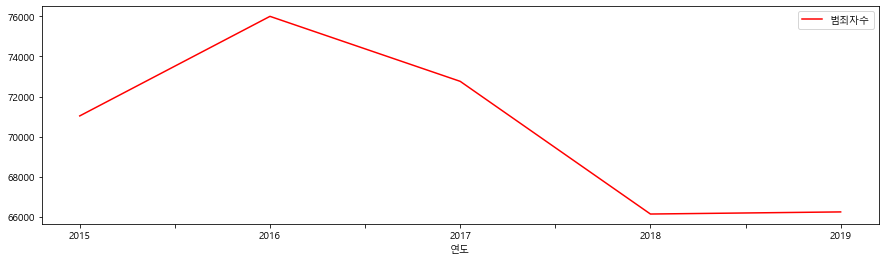

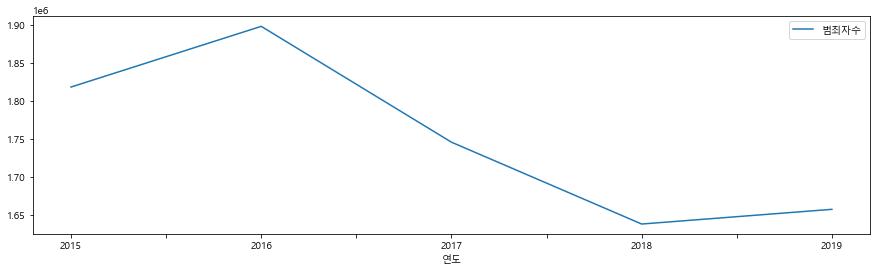

In [43]:
df_total_age_m[df_total_age_m['연령별']=='19세 미만'].set_index(['연도']).plot(figsize=(15,4), color = 'red')
df_total_age_m[df_total_age_m['연령별']=='19세 이상'].set_index(['연도']).plot(figsize=(15,4))

# 인구수와 범죄자수 추이 

In [44]:
df_total = pd.merge(df_pop_19_m, df_total_age_m, how='inner', on=None)

In [45]:
df_total

,연령별,연도,인구수,범죄자수
0,19세 미만,2015,10077252.0,71035
1,19세 이상,2015,39628411.0,1817924
2,19세 미만,2016,9825066.0,76000
3,19세 이상,2016,40030730.0,1897655
4,19세 미만,2017,9523339.0,72759
5,19세 이상,2017,40419921.0,1745478
6,19세 미만,2018,9215155.0,66142
7,19세 이상,2018,40762796.0,1637944
8,19세 미만,2019,8907564.0,66247
9,19세 이상,2019,41092721.0,1657252


In [46]:
df_total.insert(4,'비율',df_total['범죄자수']/df_total['인구수']*100)

In [47]:
df_total

,연령별,연도,인구수,범죄자수,비율
0,19세 미만,2015,10077252.0,71035,0.704904
1,19세 이상,2015,39628411.0,1817924,4.587426
2,19세 미만,2016,9825066.0,76000,0.773532
3,19세 이상,2016,40030730.0,1897655,4.740496
4,19세 미만,2017,9523339.0,72759,0.764007
5,19세 이상,2017,40419921.0,1745478,4.318361
6,19세 미만,2018,9215155.0,66142,0.717752
7,19세 이상,2018,40762796.0,1637944,4.018233
8,19세 미만,2019,8907564.0,66247,0.743716
9,19세 이상,2019,41092721.0,1657252,4.032958


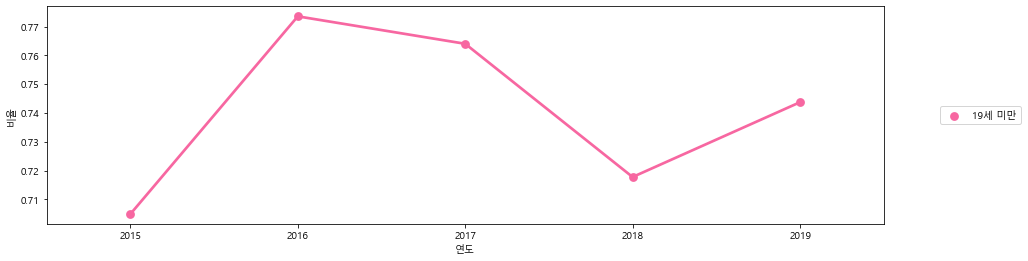

In [48]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_total[df_total['연령별']=='19세 미만'], palette='RdPu', x='연도',y='비율', hue='연령별')

plt.legend(loc='center right', bbox_to_anchor=(1.17, 0.5), ncol=1)

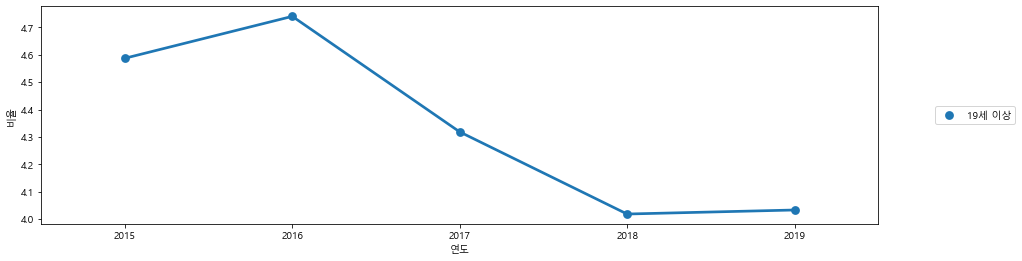

In [49]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_total[df_total['연령별']=='19세 이상'], x='연도',y='비율', hue='연령별')

plt.legend(loc='center right', bbox_to_anchor=(1.17, 0.5), ncol=1)

# 소년 인구수와 범죄율 추이

<AxesSubplot:xlabel='연도'>

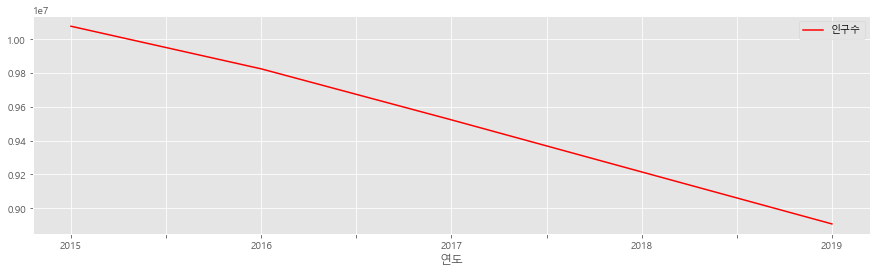

In [84]:
df_pop_19_m[df_pop_19_m['연령별']=='19세 미만'].set_index(['연도']).plot(figsize=(15,4), color = 'red')

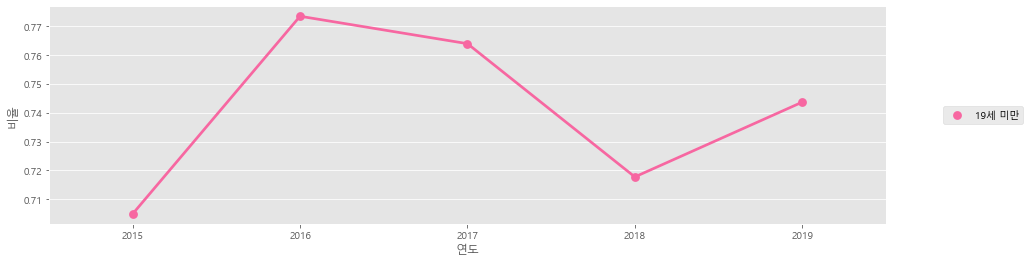

In [85]:
plt.figure(figsize=(15,4))
sns.pointplot(data=df_total[df_total['연령별']=='19세 미만'], palette='RdPu', x='연도',y='비율', hue='연령별')

plt.legend(loc='center right', bbox_to_anchor=(1.17, 0.5), ncol=1)

In [86]:
df_pop_19_m[df_pop_19_m['연령별']=='19세 미만']

,연령별,연도,인구수
0,19세 미만,2015,10077252.0
2,19세 미만,2016,9825066.0
4,19세 미만,2017,9523339.0
6,19세 미만,2018,9215155.0
8,19세 미만,2019,8907564.0


In [96]:
df_young_total = df_total[df_total['연령별']=='19세 미만']

In [97]:
df_young_total 

,연령별,연도,인구수,범죄자수,비율
0,19세 미만,2015,10077252.0,71035,0.704904
2,19세 미만,2016,9825066.0,76000,0.773532
4,19세 미만,2017,9523339.0,72759,0.764007
6,19세 미만,2018,9215155.0,66142,0.717752
8,19세 미만,2019,8907564.0,66247,0.743716


In [98]:
df_young_total = df_young_total.rename(index={0:'2015',2:'2016',4:'2017',6:'2018',8:'2019'})

In [99]:
df_young_total 

,연령별,연도,인구수,범죄자수,비율
2015,19세 미만,2015,10077252.0,71035,0.704904
2016,19세 미만,2016,9825066.0,76000,0.773532
2017,19세 미만,2017,9523339.0,72759,0.764007
2018,19세 미만,2018,9215155.0,66142,0.717752
2019,19세 미만,2019,8907564.0,66247,0.743716


In [100]:
df_young_total.iloc[:]['범죄자수']

2015    71035
2016    76000
2017    72759
2018    66142
2019    66247
Name: 범죄자수, dtype: int32

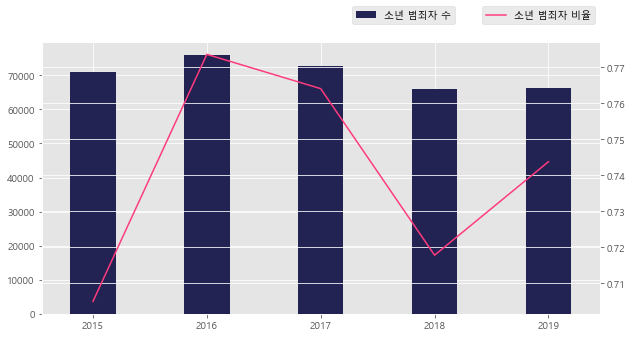

In [101]:
plt.style.use('ggplot')
# plt.style.use('dark_background')

fig, ax1 = plt.subplots()
#plt.title('연령별 소년 범죄자 수와 소년 범죄자 비율')
ax2 = ax1.twinx()
gr1 = df_young_total.iloc[:]['범죄자수']
gr2 = df_young_total.iloc[:]['비율']
gr1.plot(kind='bar', ax=ax1, color='#222353', label='소년 범죄자 수', rot=0, figsize=(10, 5), width=0.4)
gr2.plot(kind='line', ax=ax2, color='#FF3B7D', label='소년 범죄자 비율')
ax1.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2)
ax2.legend(bbox_to_anchor =(1.0, 1.15), ncol = 2)

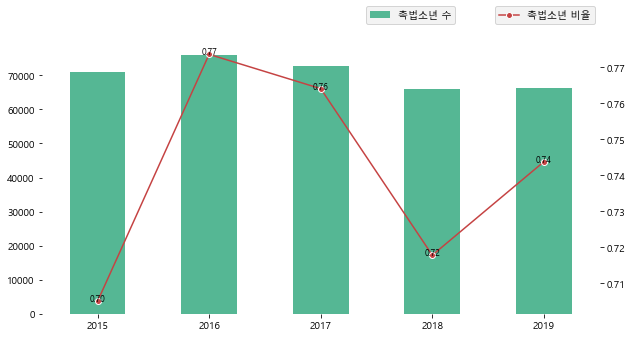

In [85]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
# 캔버스 색상 설정
#ax1.set_facecolor('#F0F0F0')
# gr1 그래프 설정
gr1 = df_young_total.iloc[:]['범죄자수']
gr1.plot(kind='bar', ax=ax1, color='#55B794', label='촉법소년 수', rot=0, figsize=(10, 5), width=0.5) # Navy
# gr2 그래프 설정
args_plot = [df_young_total.iloc[:]['비율']] ## 데이터 인자
config_plot = dict( ## 키워드 인자
    color='#C54343', # 선 색깔
    linestyle='solid', # 선 스타일
    linewidth=1.5, # 선 두께
    marker='o', # 마커 모양
    markersize=6, # 마커 사이즈
    markeredgecolor='white', # 마커 테두리 색깔
    markeredgewidth=1, # 마커 테두리 두께
)
gr2 = ax2.plot(label='촉법소년 비율', *args_plot,**config_plot) ## 선그래프 생성 - 범례라벨 추가
gr2 = gr2[0] ## 선 그래프 요소
# 선 그래프 위에 텍스트 박스 삽입
bbox2 = dict( # 텍스트 박스 스타일 지정
    boxstyle='square', # 박스 모양
    edgecolor='white',
    alpha=0)
for coord in list(gr2.get_xydata()):
    ax2.text(coord[0],coord[1],f'{float(coord[1]):.2f}',fontsize=8.5, ha='center', bbox=bbox2)
# 축 설정 (ggplot 스타일 적용 시 생략 가능)
ax1.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.spines['left'].set_color('none')
ax2.spines['left'].set_color('none')
ax1.spines['right'].set_color('none')
ax2.spines['right'].set_color('none')
ax1.spines['bottom'].set_color('none')
ax2.spines['bottom'].set_color('none')
# 범례 박스 설정
ax1.legend(bbox_to_anchor =(0.75, 1.15), ncol = 2, facecolor='#F0F0F0', fontsize=10)
ax2.legend(bbox_to_anchor =(1.0, 1.15), ncol = 2, facecolor='#F0F0F0', fontsize=10)